# Museum Visitors vs City Population Analysis

This notebook demonstrates the correlation between museum visitor numbers and city population using our API.


In [1]:
# Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# API endpoint
API_BASE = 'http://museum-api:8000'


## 1. Check API Health


In [2]:
# Check if API is running
try:
    response = requests.get(f'{API_BASE}/healthz')
    print(f"✅ API Status: {response.json()['status']}")
except:
    print("❌ API not running. Start with: docker compose up")


✅ API Status: ok


## 2. Run ETL Pipeline


In [4]:
# Trigger ETL to fetch museum data
print("🔄 Running ETL pipeline...")
etl_response = requests.post(f'{API_BASE}/etl/run')
etl_data = etl_response.json()
print(f"✅ ETL completed: {etl_data['museums']} museums, {etl_data['cities']} cities")


🔄 Running ETL pipeline...
✅ ETL completed: 86 museums, 86 cities


## 3. Load Data


In [4]:
# Get features data
features_response = requests.get(f'{API_BASE}/features')
features_data = features_response.json()

# Convert to DataFrame
df = pd.DataFrame(features_data['rows'])
print(f"📊 Loaded {len(df)} records")
print(f"Columns: {features_data['columns']}")
df.head()


📊 Loaded 86 records
Columns: ['museum_id', 'museum_name', 'city_id', 'city_name', 'year', 'visitors', 'population']


,museum_id,museum_name,city_id,city_name,year,visitors,population
0,1,Louvre,1,Paris,2024,8700000,2145906
1,2,National Museum of China,2,Beijing,2024,6956800,21893095
2,3,Vatican Museums,3,"Vatican City, Rome",2024,6825436,0
3,4,British Museum,4,London,2024,6479952,8799728
4,5,"Natural History Museum, South Kensington",4,London,2024,6301972,8799728


## 4. Data Visualization


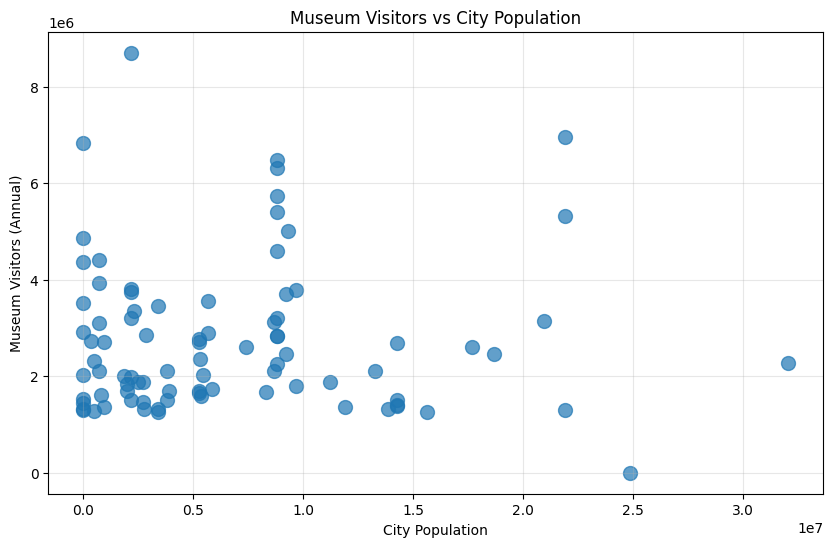


📈 Statistics:
Average visitors: 2,743,494
Average population: 6,740,443
Correlation: 0.001


In [5]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['visitors'], alpha=0.7, s=100)
plt.xlabel('City Population')
plt.ylabel('Museum Visitors (Annual)')
plt.title('Museum Visitors vs City Population')
plt.grid(True, alpha=0.3)
plt.show()

# Basic statistics
print(f"\n📈 Statistics:")
print(f"Average visitors: {df['visitors'].mean():,.0f}")
print(f"Average population: {df['population'].mean():,.0f}")
print(f"Correlation: {df['population'].corr(df['visitors']):.3f}")


## 5. Linear Regression Analysis


In [6]:
# Prepare data for regression
X = df[['population']]
y = df['visitors']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"🤖 Linear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:,.0f}")
print(f"Coefficient: {model.coef_[0]:.6f}")
print(f"Intercept: {model.intercept_:,.0f}")


🤖 Linear Regression Results:
R² Score: 0.000
Mean Absolute Error: 1,165,471
Coefficient: 0.000307
Intercept: 2,741,425


## 6. Regression Visualization


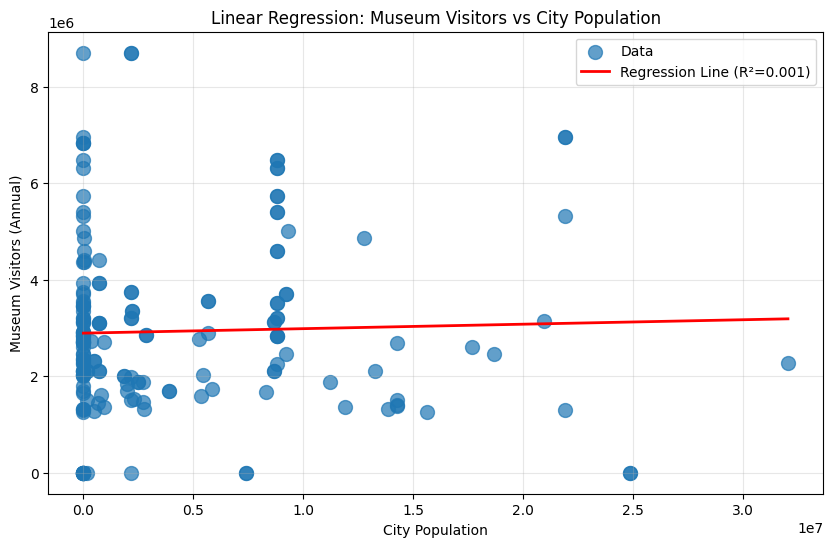

In [6]:
# Plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['visitors'], alpha=0.7, s=100, label='Data')

# Add regression line
x_line = np.linspace(df['population'].min(), df['population'].max(), 100)
# Convert to DataFrame to avoid sklearn warning
x_line_df = pd.DataFrame({'population': x_line})
y_line = model.predict(x_line_df)
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Regression Line (R²={r2:.3f})')

plt.xlabel('City Population')
plt.ylabel('Museum Visitors (Annual)')
plt.title('Linear Regression: Museum Visitors vs City Population')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
